In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer
from scipy import stats
import os
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV



In [2]:
pd.set_option('display.max_columns',100)

In [3]:
pd.set_option('display.max_rows',100)

In [4]:
X_train = pd.read_csv('datasets_f/Z_train.csv')
X_test = pd.read_csv('datasets_f/Z_test.csv')
y_train = pd.read_csv('datasets_f/y_train.csv')
y_test =pd.read_csv('datasets_f/y_test.csv')
# all have been standardscaled 

In [5]:
test = pd.read_csv('datasets_f/test.csv')

In [6]:
continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area','bsmt_fin_sf_1', 'bsmt_fin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch','3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']  
discrete = ['year_built','year_remod/add', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath','half_bath','bedroom_abv_gr','kitchen_abv_gr','tot_rms_abv_grd','fireplaces','garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold'] 
numerical = continuous+discrete 

In [7]:
dummies = ['alley',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmt_fin_type_1',
 'bsmt_fin_type_2',
 'bsmt_qual',
 'central_air_Y',
 'condition_1_Feedr',
 'condition_1_Norm',
 'condition_1_PosA',
 'condition_1_PosN',
 'condition_1_RRAe',
 'condition_1_RRAn',
 'condition_2_Norm',
 'electrical',
 'exter_cond',
 'exter_qual',
 'exterior_1st_BrkFace',
 'exterior_1st_CemntBd',
 'exterior_1st_HdBoard',
 'exterior_1st_MetalSd',
 'exterior_1st_Plywood',
 'exterior_1st_Stucco',
 'exterior_1st_VinylSd',
 'exterior_1st_Wd Sdng',
 'exterior_1st_WdShing',
 'exterior_2nd_BrkFace',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 'exterior_2nd_Stucco',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng',
 'exterior_2nd_Wd Shng',
 'fence',
 'fireplace_qu',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood',
 'functional',
 'garage_cond',
 'garage_finish',
 'garage_qual',
 'garage_type_Attchd',
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 'heating_GasW',
 'heating_Grav',
 'heating_qc',
 'house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',
 'id',
 'kitchen_qual',
 'land_contour_HLS',
 'land_contour_Low',
 'land_contour_Lvl',
 'land_slope',
 'lot_config_CulDSac',
 'lot_config_FR2',
 'lot_config_FR3',
 'lot_config_Inside',
 'lot_shape',
 'low_qual_fin_sf',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_None',
 'mas_vnr_type_Stone',
 'ms_sub_class',
 'ms_zoning_FV',
 'ms_zoning_RH',
 'ms_zoning_RL',
 'ms_zoning_RM',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'overall_cond',
 'overall_qual',
 'paved_drive',
 'pid',
 'roof_matl_Tar&Grv',
 'roof_style_Gable',
 'roof_style_Gambrel',
 'roof_style_Hip',
 'roof_style_Mansard',
 'sale_type_CWD',
 'sale_type_ConLD',
 'sale_type_ConLI',
 'sale_type_ConLw',
 'sale_type_New',
 'sale_type_Oth',
 'sale_type_WD ',
 'street_Pave',
 'utilities']
categorical = dummies 

In [8]:
high_num =['gr_liv_area','year_built','garage_area','total_bsmt_sf','full_bath']

In [9]:
high_cat = ['overall_qual','exter_qual','bsmt_qual', 'foundation_PConc']

In [10]:
X_train_numerical= pd.read_csv('datasets_f/numZ_train.csv')
X_test_numerical = pd.read_csv('datasets_f/numZ_test.csv')
test_numerical = pd.read_csv('datasets_f/kagtest.csv')


In [11]:
lr2=LinearRegression()

In [12]:
lr2.fit(X_train_numerical,y_train)

LinearRegression()

In [13]:
lr2.score(X_train_numerical,y_train)

0.8566504070476163

In [14]:
lr2.score(X_test_numerical,y_test)

0.8539369315520096

In [15]:
# Training RMSE
print('train:', mean_squared_error(y_train, lr2.predict(X_train_numerical), squared=False))
# Testing RMSE
print('test:', mean_squared_error(y_test, lr2.predict(X_test_numerical), squared=False))

train: 24965.430604585228
test: 25834.50825301229


In [16]:
cross_val_score(lr2, X_train_numerical, y_train, cv=5).mean()

0.8463881947089883

In [17]:
cross_val_score(lr2, X_test_numerical, y_test, cv=5).mean()

0.847537149618077

In [18]:
y_pred_lr2=lr2.predict(X_test_numerical)

In [19]:
X_trains = X_train[high_num].copy()

In [20]:
X_tests=X_test[high_num].copy()

In [21]:
lr3=LinearRegression()

In [22]:
lr3.fit(X_trains,y_train)

LinearRegression()

In [23]:
lr3.score(X_trains,y_train)

0.7961889686329996

In [24]:
lr3.score(X_tests,y_test)

0.8113119405454938

In [25]:
# lr3.predict(test[high_num])

In [26]:
# Training RMSE
print('train:', mean_squared_error(y_train, lr3.predict(X_trains), squared=False))
# Testing RMSE
print('test:', mean_squared_error(y_test, lr3.predict(X_tests), squared=False))

train: 29768.3437793991
test: 29363.119895962616


In [27]:
cross_val_score(lr3, X_trains, y_train, cv=5).mean()

0.7913313635750076

In [28]:
cross_val_score(lr3, X_tests, y_test, cv=5).mean()

0.8050804658688019

In [29]:
X_train_numerical.shape

(1050, 33)

In [30]:
y_train.shape

(1050, 1)

In [31]:
coefficients = lr3.coef_
peep= dict(zip(X_trains.columns,lr3.coef_[0]))

In [32]:
peep = {k: v for k, v in sorted(peep.items(), key=lambda item: item[1])}

In [33]:
peep

{'full_bath': -588.1110455627173,
 'garage_area': 12112.444934062087,
 'total_bsmt_sf': 16858.100271390045,
 'year_built': 17295.03865031243,
 'gr_liv_area': 30554.028644286056}

# Linear Regression Charts

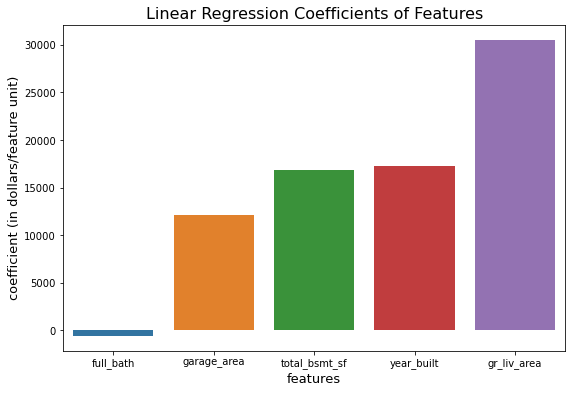

In [34]:
plt.figure(figsize=(9,6))
lr3bar = pd.DataFrame(peep.items())
sns.barplot(x=0, y=1, data=lr3bar)
plt.title('Linear Regression Coefficients of Features', fontsize=16)
plt.xlabel('features', fontsize=13)
plt.ylabel('coefficient (in dollars/feature unit)', fontsize=13)
plt.savefig('LinearRegCoeffBar.png');

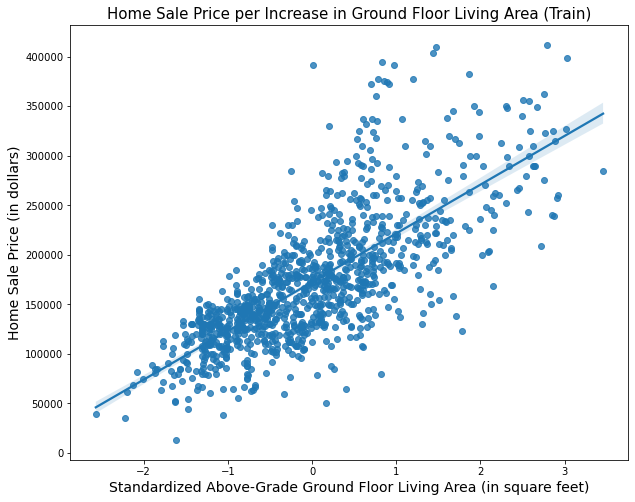

In [35]:
plt.figure(figsize=(10,8))
sns.regplot(X_trains['gr_liv_area'],y_train);
plt.title('Home Sale Price per Increase in Ground Floor Living Area (Train)', fontsize = 15)
plt.xlabel('Standardized Above-Grade Ground Floor Living Area (in square feet)', fontsize = 14)
plt.ylabel('Home Sale Price (in dollars)', fontsize = 14)
plt.savefig('HomeTrain.png');

n: The above image describes the correlation in the training data between home sale price and standardized above grade ground floor living area in square feet. There is a positive correlation and the data is better represented between around 100,000 dollars and 250,000 dollars.

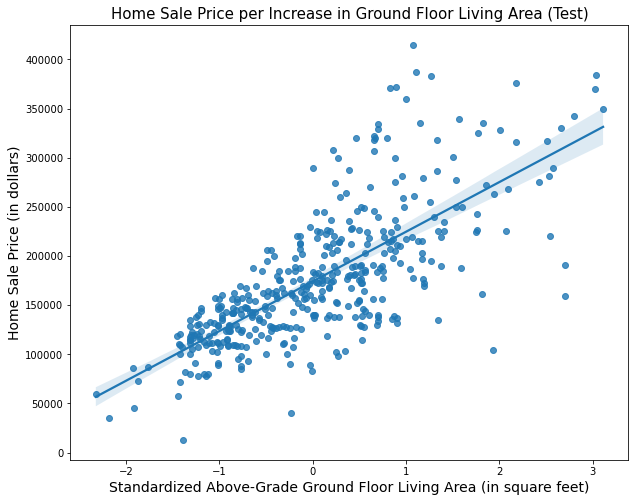

In [36]:
plt.figure(figsize=(10,8))
sns.regplot(X_tests['gr_liv_area'],y_test);
plt.title('Home Sale Price per Increase in Ground Floor Living Area (Test)', fontsize = 15)
plt.xlabel('Standardized Above-Grade Ground Floor Living Area (in square feet)', fontsize = 14)
plt.ylabel('Home Sale Price (in dollars)', fontsize = 14);
plt.savefig('HomeTest.png')

n: The above image describes the correlation in the testing data between home sale price and standardized above grade ground floor living area in square feet. There is a positive correlation and the data is better represented between around 100,000 dollars and 250,000 dollars.

In [37]:
X_train = pd.read_csv('datasets_f/Z_train.csv')
X_test = pd.read_csv('datasets_f/Z_test.csv')
y_train = pd.read_csv('datasets_f/y_train.csv')
y_test =pd.read_csv('datasets_f/y_test.csv')
# all have been standardscaled 

# Ridge GridSearchCV Charts

In [39]:
params = {'alpha': np.logspace(0, 4, 50)}
ridge_grid = GridSearchCV(Ridge(), param_grid=params, n_jobs=-1)
ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+...
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])})

In [40]:
yhat = ridge_grid.predict(X_test)
mean_squared_error(y_test, yhat, squared=False)

20185.453398642676

In [41]:
ridge_grid.score(X_test,y_test)

0.9108303547585516

In [42]:
ridge_grid.best_estimator_.coef_

array([[-2.94319315e+02, -6.65338285e+02, -2.78261283e+03,
         3.02925698e+03,  4.78497739e+03, -5.03761971e+02,
         4.83098394e+02,  0.00000000e+00,  5.35817081e+02,
         9.03341731e+03,  3.04323953e+03,  4.82319125e+03,
         1.84743538e+03,  2.95301542e+03,  4.16749479e+03,
         1.45053819e+02,  1.48628699e+03, -1.50220611e+03,
         2.45545757e+03,  1.95351396e+03,  5.71180887e+03,
         1.05503965e+03, -3.88119640e+02, -1.06887361e+03,
         5.04297913e+03,  7.42478287e+02,  1.16133408e+02,
         5.98323762e+03,  4.80781631e+03, -2.75101872e+02,
         9.26557956e+03,  1.57330591e+03,  0.00000000e+00,
         1.49520861e+03,  1.63412454e+03, -1.88682311e+03,
         0.00000000e+00,  4.17745432e+03,  2.53902965e+03,
         2.51026391e+03,  1.52287060e+03,  2.34833277e+03,
         1.59959227e+03,  1.33739606e+03,  1.79670717e+03,
         3.02608008e+03,  2.68099338e+02, -1.33848723e+03,
         9.73191063e+02,  1.16428763e+03,  9.23669053e+0

In [43]:
# ridge_grid.predict(X_test)


In [44]:
X_train.columns

Index(['id', 'pid', 'ms_sub_class', 'lot_frontage', 'lot_area', 'alley',
       'lot_shape', 'utilities', 'land_slope', 'overall_qual',
       ...
       'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd',
       'sale_type_CWD', 'sale_type_ConLD', 'sale_type_ConLI',
       'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=159)

In [45]:
len(ridge_grid.best_estimator_.coef_[0])

159

In [46]:
meep= dict(zip(X_train.columns,ridge_grid.best_estimator_.coef_[0]))

In [47]:
meep = {k: v for k, v in sorted(meep.items(), key=lambda item: item[1])}

In [48]:
meep

{'neighborhood_NAmes': -3226.3483580270054,
 'neighborhood_Edwards': -3082.954657410441,
 'ms_sub_class': -2782.612833682687,
 'neighborhood_NWAmes': -2719.0837645436727,
 'neighborhood_CollgCr': -2340.6358522234973,
 'neighborhood_Gilbert': -2201.16820904855,
 'neighborhood_SawyerW': -1953.6189820735167,
 'bedroom_abv_gr': -1886.8231079337777,
 'neighborhood_IDOTRR': -1666.1691863824444,
 'neighborhood_OldTown': -1605.412148418594,
 'bldg_type_TwnhsE': -1508.2440540899702,
 'bsmt_cond': -1502.2061138154743,
 'exterior_2nd_Plywood': -1378.2929665660747,
 'garage_cond': -1338.4872343663912,
 'roof_matl_Tar&Grv': -1116.8219106199413,
 'condition_1_RRAe': -1096.6280200639233,
 'bsmt_unf_sf': -1068.8736067208395,
 'exterior_2nd_HdBoard': -1053.6113134388252,
 'bldg_type_Twnhs': -1031.015208077733,
 'mas_vnr_type_BrkFace': -985.933067168431,
 'neighborhood_MeadowV': -941.3873885495075,
 'neighborhood_Mitchel': -910.4746190230028,
 'lot_config_FR3': -862.1248528749076,
 'neighborhood_Sawyer'

In [49]:
[x for x in meep.keys() if 'neighborhood' in x]

['neighborhood_NAmes',
 'neighborhood_Edwards',
 'neighborhood_NWAmes',
 'neighborhood_CollgCr',
 'neighborhood_Gilbert',
 'neighborhood_SawyerW',
 'neighborhood_IDOTRR',
 'neighborhood_OldTown',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_Sawyer',
 'neighborhood_Blueste',
 'neighborhood_SWISU',
 'neighborhood_ClearCr',
 'neighborhood_Greens',
 'neighborhood_BrkSide',
 'neighborhood_BrDale',
 'neighborhood_Somerst',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'neighborhood_NoRidge',
 'neighborhood_Crawfor',
 'neighborhood_StoneBr',
 'neighborhood_NridgHt']

In [58]:
# sorted(meep, key=meep.get, reverse=True)


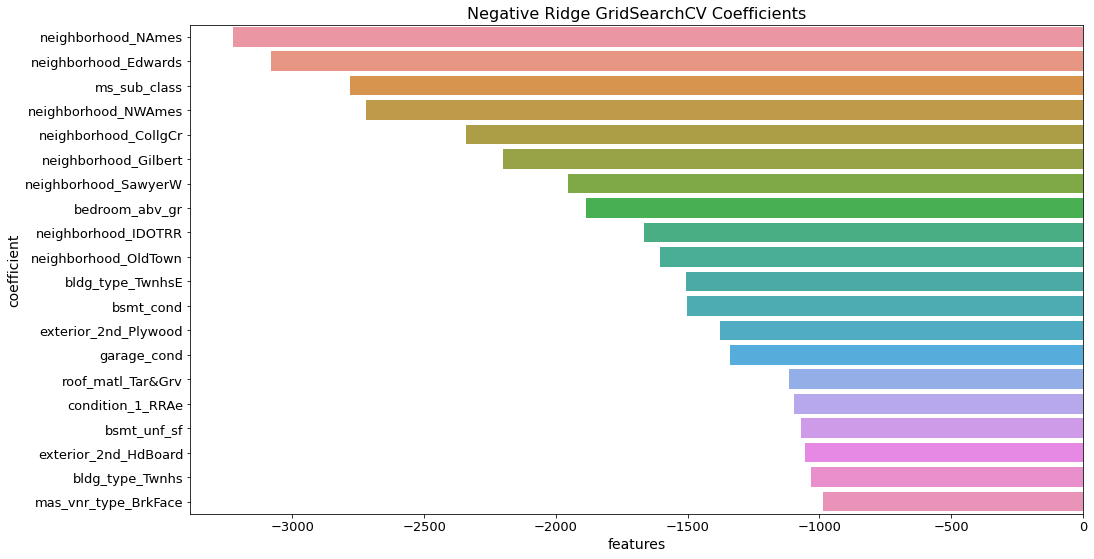

In [52]:
ridgegridsearchCV = pd.DataFrame(meep.items())
plt.figure(figsize=(16,9))
sns.barplot(x=1,y=0, data = ridgegridsearchCV[:20], orient = 'h')
plt.title('Negative Ridge GridSearchCV Coefficients', fontsize=16)
plt.xlabel('features',fontsize=14)
plt.ylabel('coefficient',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('NegativeRidge.png')

n: The above image represents the negative coefficients determined by Ridge GridSearchCV of different features found in the housing data set.  Having a negative value correlates to a marked decrease of sale price.

In [53]:
# ridgegridsearchCV = pd.DataFrame(meep.items())
# ax = sns.barplot(x=1, y=0, data=ridgegridsearchCV[:20], orient = 'h')
# ax.set(xlabel = 'features', ylabel='coefficient', title='Ridge GridSearchCV Coefficients');

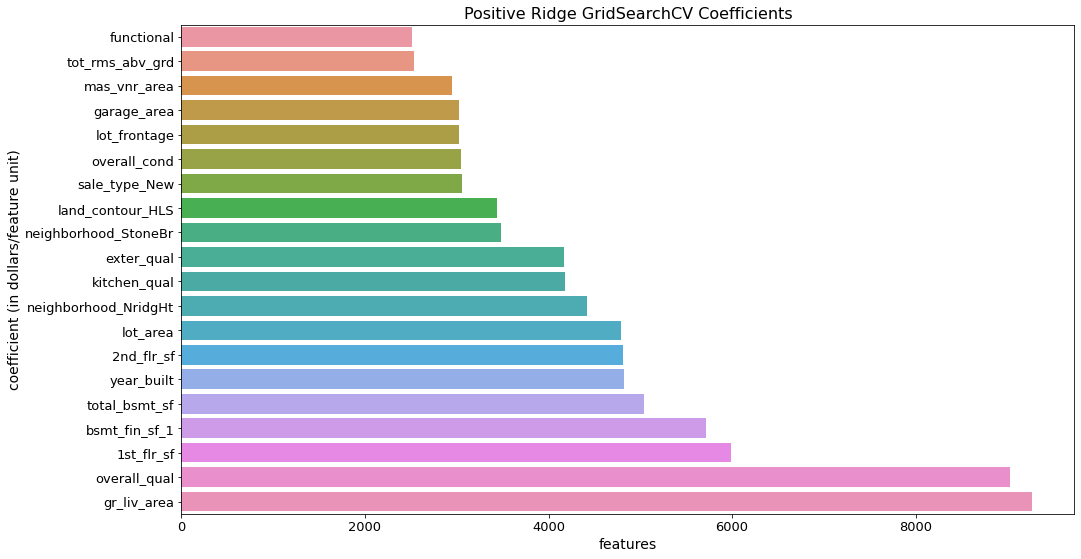

In [54]:
ridgegridsearchCV = pd.DataFrame(meep.items())
plt.figure(figsize=(16,9))
sns.barplot(x=1,y=0, data = ridgegridsearchCV[-20:], orient = 'h')
plt.title('Positive Ridge GridSearchCV Coefficients', fontsize=16)
plt.xlabel('features',fontsize=14)
plt.ylabel('coefficient (in dollars/feature unit)',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('PositiveRidge.png')

n: The above image represents the positive coefficients determined by Ridge GridSearchCV of different features found in the housing data set.  Having a positive value correlates to a marked increase of sale price.

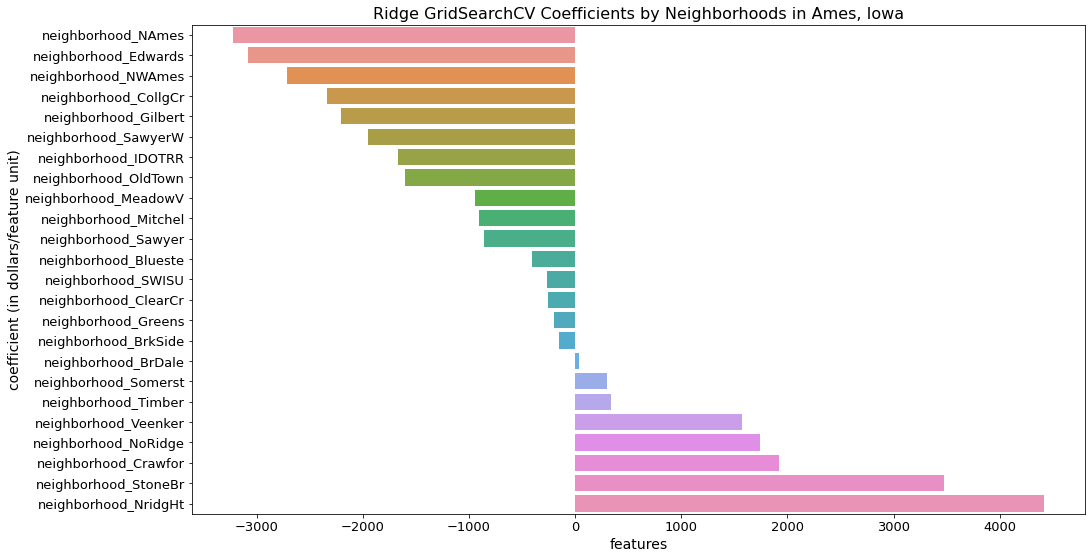

In [56]:
ridgegridsearchCV = pd.DataFrame({k:v for k,v in meep.items() if 'neighborhood' in k}.items())
plt.figure(figsize=(16,9))
sns.barplot(x=1,y=0, data = ridgegridsearchCV, orient = 'h')
plt.title('Ridge GridSearchCV Coefficients by Neighborhoods in Ames, Iowa', fontsize=16)
plt.xlabel('features',fontsize=14)
plt.ylabel('coefficient (in dollars/feature unit)',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('RidgeNeighborhoods.png');

n: The above image represents the  coefficients determined by Ridge GridSearchCV of the neighborhoods  found in the housing data set.  Having a negative value correlates to a marked decrease of sale price, and having a positive value correlates to a marked increase of sale price.

In [57]:

# ridgegridsearchCV = pd.DataFrame({k:v for k,v in meep.items() if 'neighborhood' in k}.items())
# ax = sns.barplot(x=1, y=0, data=ridgegridsearchCV, orient = 'h')
# ax.set(xlabel = 'features', ylabel='coefficient', title='Ridge GridSearchCV Coefficients');
